# hw1 b05601005 陳廷安
# Question 1

In [109]:
import numpy as np
from cvxopt import matrix
from cvxopt import solvers

P = np.array([[0,0,0], 
              [0,1,0],
              [0,0,1]])

q = np.array([0,0,0]).T

g1 = np.array([-1,4,0])
g2 = np.array([-1,1,3])
g3 = np.array([-1,1,-1])
g4 = np.array([1,0,0])
g5 = np.array([1,2,-5])
g6 = np.array([1,2,3])
g7 = np.array([1,2,3])

G = -np.vstack((g1,g2,g3,g4,g5,g6,g7))

h = -np.ones((7,1))

P = matrix(P, tc='d')
q = matrix(q, tc='d')
G = matrix(G, tc='d')
h = matrix(h, tc='d')

print("-"*50)
print("Solved Optimum: \n", sol['x'], sep='')

--------------------------------------------------
Solved Optimum: 
[ 4.32e-09]
[ 7.04e-01]
[ 7.04e-01]
[ 8.89e-01]
[ 2.59e-01]
[ 2.59e-01]
[ 5.27e-10]



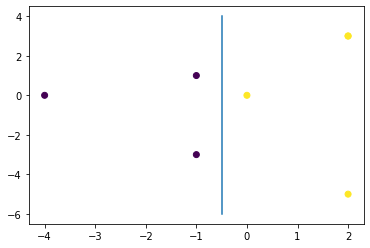

In [3]:
import matplotlib.pyplot as plt
x = [[1,0], [0,1], [0,-1], [-1,0], [0,2], [0,-2], [-2,0]]
y = [-1,-1,-1,1,1,1,1]

def zTrans(x):
    x1 = x[0]
    x2 = x[1]
    z1 = x2**2 - 2*x1 -2
    z2 = x1**2 - 2*x2 -1
    return [z1,z2]

z = [zTrans(xx) for xx in x]
z1, z2 = zip(*z)

plt.figure()
plt.scatter(z1, z2, c=y)
plt.plot([-0.5,-0.5], [-6,4])
plt.show()

<font size="4"> 
By the solution given above, we have $b=1$, $w_1=2$ and $w_2\approx0$. <br />
Hence, the hyperplane can be written as $2z_1 + 1 = 0$, <br />
that is, $2x_2^2 - 4x_1 - 3= 0. (eq.1)$
<br /><br /><br /><br /><br /><br /><br /><br />
</font>


# Question 2

In [110]:
x = [[1,0], [0,1], [0,-1], [-1,0], [0,2], [0,-2], [-2,0]]
x = np.array(x)
y = [-1,-1,-1,1,1,1,1]

P = np.zeros([7,7])
for i in range(7):
    for j in range(7):
        P[i,j] = y[i]*y[j]*(1+sum(x[i]*x[j]))**2

q = -1*np.ones((7,1))

A = np.array(y).reshape(1,7)
c = 0

G = -np.identity(7)

h = np.zeros((7,1))

P = matrix(P, tc='d')
q = matrix(q, tc='d')
G = matrix(G, tc='d')
h = matrix(h, tc='d')
A = matrix(A, tc='d')
c = matrix(c, tc='d')

print("-"*50)
print("Solved Optimum: \n", sol['x'], sep='')

--------------------------------------------------
Solved Optimum: 
[ 4.32e-09]
[ 7.04e-01]
[ 7.04e-01]
[ 8.89e-01]
[ 2.59e-01]
[ 2.59e-01]
[ 5.27e-10]



<font size="4"> 
By the solution given above, <br />
we have $a_1=a_7\approx 0, a_2=a_3=0.704, a_4=0.889, a_5=a_6=0.259$. <br />
Since the support vector's $a \neq 0$, <br />
the support vectors are $x_2, x_3, x_4, x_5, x_6$.
<br /><br /><br /><br /><br /><br />
</font>

# Question 3
<font size="4"> 
By the lectures, <br />

$\begin{equation} \label{eq1}
\begin{split}
g_{svm}(x) &=sign (\sum_{sv} a_n y_n K(x_n, x)+b) \\
 & = sign(0.704\times-1\times(1+0x_1+1x_2)^2+ \\
 & 0.704\times-1\times(1+0x_1+-1x_2)^2+ \\
 & 0.889\times1\times(1+-1x_1+0x_2)^2+ \\
 & 0.259\times1\times(1+0x_1+2x_2)^2+ \\
 & 0.259\times1\times(1+0x_1+-2x_2)^2+ \\
 & 1.666\\
 & = sign(0.664x_2^2 + 0.889x_1^2 - 1.778x_1 + 1.665)\\
 & = sign(eq.3))
\end{split}
\end{equation}$


</font>


# Question 4
<font size="4"> 
$eq.1=2x_2^2 - 4x_1 - 3= 0$ <br />
$eq.3=0.664x_2^2 + 0.889x_1^2 - 1.778x_1 - 1.665$ <br />
<br />
By comparing the formulae, eq.1 and eq.3 are different. <br />
Furthermore, they should not be the same as well, since they have different support vectors and different kernels.
</font> 

# Question 5
<font size="4"> 
$L((b,w,\epsilon),(\alpha, \beta))=
\frac{1}{2}\ ww^T+C\cdot \sum_{n=1}^{N}\epsilon_n
\ +\ \sum_{n=1}^{N}\alpha_n\cdot(\rho_n-\epsilon_n-y_n(w^tz_n+b))
\ +\ \sum_{n=1}^{N}\beta_n\cdot(-\epsilon_n) $
</font>

# Question 6
<font size="4"> 
$max_{\alpha_n\geq0, \beta_n\geq0}${ $min_{\beta, w, \epsilon}${ $L((b,w,\epsilon),(\alpha, \beta))$ } } <br />

Considering $\frac{\partial L}{\partial \epsilon}=0$, we can solve the problem without lossing optimality <br />
if solving with implicit constraint $\beta_n=C-\alpha_n$ and explicity constraint $0\leq\alpha_n\leq C$. <br />
We can simplify the Lagrange dual problem to: <br />
<br />
$max_{0\leq\alpha_n\leq C, \beta_n=C-\alpha_n}${ $min_{\beta,w,\epsilon}${ 
$\frac{1}{2}w^Tw\ +\sum_{n=1}^{N}\alpha_n\cdot(\rho_n-y_n(w^tz_n+b))$ 
} } <br />
<br />
For the inner problem <br />
considering $\frac{\partial L}{\partial b}=0$ and $\frac{\partial L}{\partial w}=0$, <br />
we can solve the problem without lossing optimality <br />
if solving with implicit constraint $\sum_{n=1}^{N}\alpha_ny_n=0$ and $w_i=\sum_{n=1}^{N}\alpha_ny_nz_n$ <br />
<br />
We can simplify the Lagrange dual problem to: <br />
<br />
$max_{0\leq\alpha_n\leq C, \beta_n=C-\alpha_n}$ { 
$-\frac{1}{2}||\sum_{n=1}^{N}\alpha_ny_nz_n||^2 +\sum_{n=1}^{N}\rho_n\alpha_n$ }, <br />
<br />
which is <br />
$min_{\alpha}\frac{1}{2}\sum_{n=1}^{N}\sum_{m=1}^{N}\alpha_n\alpha_my_ny_mz_n^Tz_m -\sum_{n=1}^{N}\rho_n\alpha_n$ <br />
<br />
subject to <br />
$\sum_{n=1}^{N}\alpha_ny_n=0$; <br />
$\alpha_n \geq 0$, for $n=1,2,...,N$
</font>


# Question 7
<font size="4"> 
This is the P_1^{'} SVM with $\rho_n=0.5$<br />
<br />
$(P_1^{'})\ min_{w^{'},\beta^{'},\epsilon^{'}} \ \ \frac{1}{2}\ w^{'}w^{'T}+C\cdot \sum_{n=1}^{N}\epsilon^{'}_n$ <br />
s.t. $y_n(w^{'T}x_n+b^{'})\geq0.5-\epsilon^{'}_n$ <br />
<br />
By scaling the objective function by 4 and constraint by 2 and we can have: <br />
<br />
$(P_1^{'})\ min_{w^{'},\beta^{'},\epsilon^{'}} \ \ \frac{1}{2}\ 4w^{'}w^{'T}+2C\cdot \sum_{n=1}^{N}2\epsilon^{'}_n$ <br />
s.t. $y_n(2w^{'T}x_n+2b^{'})\geq1-2\epsilon^{'}_n$ <br />
<br />
It can also be represent as the eqaution below: <br />
<br />
$min_{w,\beta,\epsilon}\ \ \frac{1}{2}\ ww^T+2C\cdot \sum_{n=1}^{N}\epsilon_n$ <br />
s.t. $y_n(w^Tx+b)\geq1-\epsilon_n$ <br />
<br />
where $w=2w^{'}$, $b_n=2b^{'}$ and $\epsilon_n=2\epsilon^{'}_n$ <br />
<br />
Hence, Assume that $(\beta_*^{'},w_*^{'})$ is the optimal solution of solving $P_1^{'}$ with all $\rho_n=0.5$. 
<br />
The optimal solution of $P_1$ with $C_1=2C$ can be express as $(\beta_*,w_*)=(2\beta_*^{'},2w_*^{'})$.
<br /><br /><br /><br /><br /><br />
</font> 

# Question 8
<font size="4"> 
Soft-margin SVM dual is almost the same as hard-margin's, except that soft-margin SVM dual has a upper-bound $C$ for each $\alpha_n$. Hence, if $C\geq max_{1\leq n\leq N}a_n^*$, we can add the constraint $0\leq a_n\leq C$ to hard-margin SVM dual while not affecting the optimum result. As a result, this hard-margin SVM dual becomes a soft-margin SVM dual, having the same optimun $a*$.
</font>

# Question 9
<font size="4"> 
Let the GRAM matrix of $K$ and $K_1$ be $M$ and $M_1$ respectively. <bt />
</font>
## (a)
<font size="4"> 
$K=(1-K_1(x,x^`))^{1}$ is not a valid kernel. <br />
Here is a Counterexample: <br />
<br />
Let $M_1=\begin{bmatrix}
0.9 & 0.1 \\
0.1 & 0.9 
\end{bmatrix}$
, then
$M= \begin{bmatrix}
0.1 & 0.9 \\
0.9 & 0.1 
\end{bmatrix}$. <br />
Since $det(M)<0$, $M$ is not a p.s.d matrix, therefore $K$ is not a valid kernel.
</font>
## (b)
<font size="4"> 
$K=(1-K_1(x,x^`))^{0}$ is a valid kernel. <br />
Since $M=J$, and $J$ is a p.s.d. matrix.
</font>
## (c)
<font size="4"> 
$K=(1-K_1(x,x^`))^{-1}$ is a valid kernel. <br />
<br />
By Taylor expansion, 
$K=\sum_{i=0}^{\infty}(K_1(x,x^`))^{i}$ <br />
<br />
Let $K_n(x,x^`)$ and $K_m(x,x^`)$ be valid kernels <br /> 
<br /> 
$\begin{equation} \label{eq1}
\begin{split}
K_n(x,x^`)\times K_m(x,x^`) 
 & = \phi_n(x)^T\phi_n(x^`)\phi_m(x)^T\phi_m(x) \\
 & = \sum_{i=1}^n\phi^i_n(x)\phi^i_n(x^`)\sum_{i=1}^n\phi^j_m(x)\phi^j_m(x)\\
 & = \sum_{i=1}^n\sum_{j=1}^n\phi^i_n(x)\phi^i_n(x^`)\phi^j_m(x)\phi^j_m(x)\\
 & = \sum_{i=1}^n\sum_{j=1}^n(\phi^i_n(x)\phi^j_m(x))(\phi^i_n(x^`)\phi^j_m(x))
\end{split}
\end{equation}$

<br /> 
Let $\Phi^i(x)=\sum_{j=1}^n\phi_1^i(x)\phi_2^j(x)$<br /> 
<br /> 
$\Phi(x)=\sum_{i=1}^n\Phi^i(x)$<br /> 
$(\Phi^i(x))^T(\Phi^i(x))=\sum_{j=1}^n\phi_1^i(x)\phi_2^j(x)\phi_1^i(x)\phi_2^j(x)$<br /> 

$\begin{equation} \label{eq2}
\begin{split}
(\Phi(x))^T(\Phi(x)) 
 & = \sum_{i=1}^n(\Phi^i(x))^T(\Phi^i(x)) \\
 & = \sum^n_{i=1}\sum_{j=1}^n\phi_1^i(x)\phi_2^j(x)\phi_1^i(x)\phi_2^j(x)\\
 & = K_n(x,x^`)\times K_m(x,x^`)
\end{split}
\end{equation}$
<br />  
Hence, $K_n(x,x^`)\times K_m(x,x^`)$ is a valid kernel.
<br /> 
Also, the sum of valid kernels is also a valid kernel since the sum of p.s.d. matrices is still a psd matix.<br />
<br />
Hence, $K=\sum_{i=0}^{\infty}(K_1(x,x^`))^{i}$ is a valid kernel.
</font> 
## (d)
<font size="4"> 
$K=(1-K_1(x,x^`))^{-2}$ is a valid kernel. <br />
<br />
Since $(1-K_1(x,x^`))^{-1}$ is a valid kernel, $(1-K_1(x,x^`))^{-2}=(1-K_1(x,x^`))^{-1}\times(1-K_1(x,x^`))^{-1}$ is also a valid kernel.<br />
</font>

# Question 10
<font size="4"> 
This is the SVM dual of kernel $K$ and parameter $C$. <br />
<br />
$min_{\alpha}\ \frac{1}{2}\sum_{n=1}^{N}\sum_{m=1}^{N}\alpha_n\alpha_my_ny_mK(x_n,x_m) -\sum_{n=1}^{N}\alpha_n$ <br />
s.t. <br />
$\sum_{n=1}^{N}\alpha_ny_n=0$; <br />
$0\leq\alpha_n\leq C$, for $n=1,2,...,N$ <br />
<br />
This is the SVM dual of kernel $pK$ and parameter $C/p$. <br />
<br />
$min_{\alpha^*}\ \frac{1}{2}\sum_{n=1}^{N}\sum_{m=1}^{N}\alpha^*_n\alpha^*_my_ny_mpK(x_n,x_m) -\sum_{n=1}^{N}\alpha^*_n$ <br />
s.t. <br />
$\sum_{n=1}^{N}\alpha^*_ny_n=0$; <br />
$0\leq\alpha^*_n\leq C/p$, for $n=1,2,...,N$ <br />
<br />
    
The SVM dual of kernel $pK$ and parameter $C/p$ can also be written as:<br />
    
$min_{\alpha^*}\ \frac{1}{2}\frac{1}{p}(\sum_{n=1}^{N}\sum_{m=1}^{N}p\alpha^*_np\alpha^*_my_ny_mK(x_n,x_m) -\sum_{n=1}^{N}p\alpha^*_n)$ 
<br />
$0\leq p\alpha^*_n\leq C$, for $n=1,2,...,N$ <br />
<br />

Let $\alpha^{**} = p\alpha^*$. <br />
    
$min_{\alpha^{**}}\ \frac{1}{2}\frac{1}{p}(\sum_{n=1}^{N}\sum_{m=1}^{N}\alpha^{**}_n\alpha^{**}_my_ny_mK(x_n,x_m) -\sum_{n=1}^{N}\alpha^{**}_n)$ 
<br />
s.t. <br />
$\sum_{n=1}^{N}\alpha^{**}_ny_n=0$; <br />
$0\leq \alpha^{**}_n\leq C$, for $n=1,2,...,N$ <br />

Since $p$ is a constant, we can ignore it for our objective function and find this dual problem is the same as that of kernel $K$ with parameter $C$. Hence, the two dual problems share the same optimal solution, that is, $\alpha_{optim} = \alpha^{**}_{optim} = p\alpha^*_{optim}.$ <br />

We first get the solution of $b^*$ by $b$ <br />
<br />
$\begin{equation} \label{eq1}
\begin{split}
b^* & = y_m - \sum_{n=1}^{N} a^*_n y_n K^*(x_n, x) \\
 & = y_m - \sum_{n=1}^{N} \frac{\alpha_n}{p} y_n pK^(x_n, x) \\
 & = b
\end{split}
\end{equation}$


(each $y_m$'s corresponding $a_m\neq0$)<br />
<br />
We can show the two SVM has the same classifier.<br />
<br />
$\begin{equation} \label{eq2}
\begin{split}
g^*(x) & = sign(\sum_{n=1}^{N} a^*_n y_n K^*(x_n, x)+b*) \\
 & = sign(\sum_{n=1}^{N} \frac{\alpha_n}{p} y_n pK(x_n, x)+b) \\
 & = g(x)
\end{split}
\end{equation}$
<br />
<br />

</font>


# Question 11
<font size="4"> 
Load in data...
<font />

In [5]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib
from libsvm.svmutil import *
file_train = "./features.train.txt"
file_test = "./features.test.txt"
x_train = []
y_test = []

with open(file_train, 'r', newline='\n') as f:
    rows = csv.reader(f, delimiter=' ')
    train = [[float(ele) for ele in row if ele!=''] for row in rows]
    
with open(file_test, 'r', newline='\n') as f:
    rows = csv.reader(f, delimiter=' ')
    test = [[float(ele) for ele in row if ele!=''] for row in rows]

train = np.array(train)
test = np.array(train)
x_train = train[:,1:]
x_test = test[:,1:]

Accuracy = 0% (0/4) (classification)
Accuracy = 0% (0/4) (classification)
Accuracy = 25% (1/4) (classification)
Accuracy = 25% (1/4) (classification)
Accuracy = 25% (1/4) (classification)


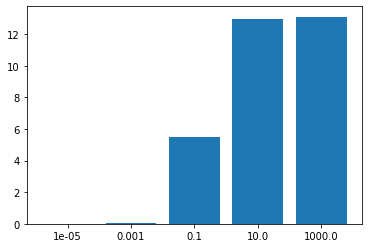

In [6]:
y_train_q11 = [1 if row[0]==0 else -1 for row in train]
y_test_q11 = [1 if row[0]==0 else -1 for row in test]
prob  = svm_problem(y_train_q11, x_train)

def getWeightNorm(c_str):
    
    param = svm_parameter(('-t 0 -c '+c_str))
    m = svm_train(prob, param)
    p_label, p_acc, p_val = svm_predict(y=[1,1,1,1], x=[[0.,0.,0.], [1.,0.,0.], [0.,1.,0.], [0.,0.,1.]], m=m)
    w_q11 = np.array(p_val[1:])
    w_q11 = w_q11-p_val[0]
    return np.linalg.norm(w_q11)

C = [1e-5, 1e-3, 1e-1, 1e+1, 1e+3]
C_str = [str(c) for c in C]
w_norm = [getWeightNorm(c_str) for c_str in C_str]
plt.figure()
plt.bar(C_str, w_norm)
plt.show()

<font size="4"> 
As $C$ getting greater in value, $||w||$ also increase. <br />
It makes sense because when $C$ is small, the objective function will mainly focus on minimizing 1/2$||w||^2$, <br />
so the optimal $||w||$ would be small.
<br /><br /><br /><br /><br /><br /><br /><br />
<font />

# Question 12

Accuracy = 92.5662% (6749/7291) (classification)
Accuracy = 92.5662% (6749/7291) (classification)
Accuracy = 92.5662% (6749/7291) (classification)
Accuracy = 92.5662% (6749/7291) (classification)
Accuracy = 92.5662% (6749/7291) (classification)


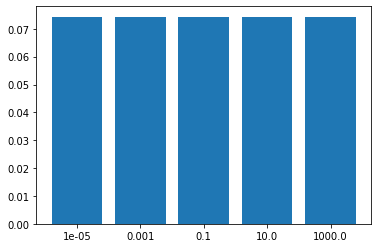

In [7]:
y_train_q12 = [1 if row[0]==8 else -1 for row in train]
y_test_q12 = [1 if row[0]==8 else -1 for row in test]

def getEin(c_str):
    prob  = svm_problem(y_train_q12, x_train)
    param = svm_parameter('-t 1 -d 2 -c '+c_str) #Set parameters
    m = svm_train(prob, param) #Training
    p_label, p_acc, p_val = svm_predict(y_train_q12, x_train, m) #Predict training set
    return (100-p_acc[0])/100 #Calculate E_in

C = [1e-5, 1e-3, 1e-1, 1e+1, 1e+3]
C_str = [str(c) for c in C]
Ein_q12 = [getEin(c_str) for c_str in C_str]

plt.figure()
plt.bar(C_str, Ein_q12)
plt.show()

<font size="4"> 
$E_{in}$ doesn't change with the value of $C$.
<br /><br /><br /><br /><br /><br /><br /><br /><br /><br />
<font />

# Question 13

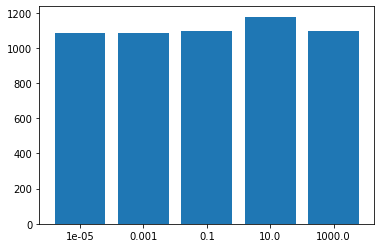

In [108]:
y_train_q12 = [1 if row[0]==8 else -1 for row in train]
y_test_q12 = [1 if row[0]==8 else -1 for row in test]

def getNumSV(c_str):
    prob  = svm_problem(y_train_q12, x_train)
    param = svm_parameter('-t 1 -d 2 -c '+c_str) #Set parameters
    m = svm_train(prob, param) #Training
    return(m.get_nr_sv()) #Get the number of SVs

C = [1e-5, 1e-3, 1e-1, 1e+1, 1e+3]
C_str = [str(c) for c in C]
nSV_q12 = [getNumSV(c_str) for c_str in C_str]

plt.figure()
plt.bar(C_str, nSV_q12)
plt.show()

<font size="4"> 
Similar to $E_{in}$, the number of SV doesn't change much with the value of $C$.
<font />

# Question 14
<font size="4"> 
Much thanks to the classmates who discussed this question on the forum. <br />
<br />
$\begin{equation} \label{eq1}
\begin{split}
g(x) & = w^Tz+b \\
 & = \sum_{sv}\alpha_ny_nK(x_n,x)+b \\
 & =\sum_{sv}\alpha_ny_nK(x_n,x)+y_{sv}-\sum_{sv}\alpha_ny_nK(x_n,x) \\
 & =y_{sv}
\end{split}
\end{equation}$
<br />
<br />
Hence, in the Z space, the distance from the hyperplane to a free-SV is <br />
$\frac{1}{||w||}|w^Tz+b|=\frac{1}{||w||}|g(x)|=\frac{1}{||w||}$  <br />
<br />
For calculating $||w||$, we know that $w=\sum_{sv}\alpha_iy_iz_i$, and we can have<br />
$||w||^2=\sum_{sv}\sum_{sv}\alpha_iy_iz_i\alpha_jy_jz_j=\sum_{sv}\sum_{sv}\alpha_iy_i\alpha_jy_jK(x_i,x_j)$
</font> 

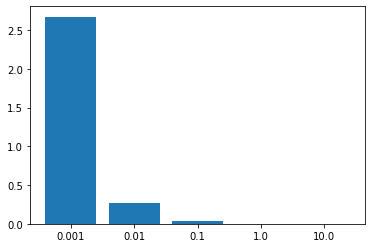

In [96]:
y_train_q14 = [1 if row[0]==0 else -1 for row in train]
y_test_q14 = [1 if row[0]==0 else -1 for row in test]

def K_rbf(x1, x2, g=80):
    return np.exp(-g*sum((x1-x2)**2))

def getFreeSVDist(c_str, y=y_train_q14):
    prob  = svm_problem(y, x_train)
    param = svm_parameter('-t 2 -g 80 -c '+c_str)
    m = svm_train(prob, param)
    SV = m.get_SV() #Get SVs
    SV = [np.array([sv[1], sv[2]]) for sv in SV] #Extract SV from dictionary to numpy.array
    SV_idx = m.get_sv_indices() #Get the indices of SVs in the training data
    a = m.get_sv_coef() #Get coeficient a
    a = [aa[0] for aa in a] #Extract a from nested list to list
    nSV = len(SV) #Get the number of SVs
    # Calculate the ||w||^2
    w_norm2 = np.sum([a[i]*a[j]*y[SV_idx[i]-1]*y[SV_idx[j]-1]*K_rbf(SV[i], SV[j]) for i in range(nSV) for j in range(nSV)])
    return(w_norm2**(-1/2)) #return 1/||w||

C = [1e-3, 1e-2, 1e-1, 1e+0, 1e+1]
C_str = [str(c) for c in C]
dist_q14 = [getFreeSVDist(c_str) for c_str in C_str]

plt.figure()
plt.bar(C_str, dist_q14)
plt.show()

<font size="4"> 
The distance from the hyperplane to a free-SV decreases drastically while $C$ increase. <br />
It is probably because that when $C$ is small, the SVM has more tolerence to error terms, so the optimizer can come up with a larger margin.
<font />

# Question 15

Accuracy = 89.439% (6521/7291) (classification)
Accuracy = 90.2208% (6578/7291) (classification)
Accuracy = 90.3991% (6591/7291) (classification)
Accuracy = 83.6236% (6097/7291) (classification)
Accuracy = 83.6236% (6097/7291) (classification)


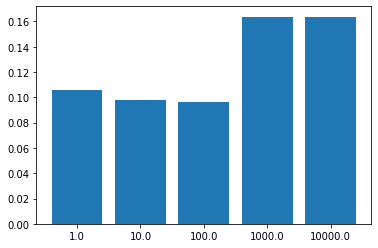

In [31]:
prob  = svm_problem(y_train_q14, x_train)
param = svm_parameter('-t 2 -g 80 -c 0.1')
m = svm_train(prob, param)

def getEout(g_str):
    prob  = svm_problem(y_train_q14, x_train)
    param = svm_parameter('-t 2 -c 0.1 -g '+g_str) #Ser parameters
    m = svm_train(prob, param) #Training
    p_label, p_acc, p_val = svm_predict(y_test_q14, x_test, m) #Predict testing set
    return (100-p_acc[0])/100 #Calculate E_out

G = [1e0, 1e+1, 1e+2, 1e+3, 1e+4]
G_str = [str(g) for g in G]
Eout_q15 = [getEout(g_str) for g_str in G_str]

plt.figure()
plt.bar(G_str, Eout_q15)
plt.show()

<font size="4"> 
The result shows that it is important to find proper $\gamma$ while testing the model. <br />
The model is not always better with the big parameter, and vice versa.
<br /><br /><br /><br /><br /><br /><br /><br />
<font />

# Question 16

In [98]:
import random
idx = np.arange(len(x_train)) #Set indices from sampling
x_train = np.array(x_train)
y_train_q14 = np.array(y_train_q14)

# Function to calculate E_out with assigned gamma value
def getEval(g_str, x_train, y_train, x_val, y_val):
    prob  = svm_problem(y_train, x_train)
    param = svm_parameter('-t 2 -c 0.1 -g '+g_str)
    m = svm_train(prob, param)
    p_label, p_acc, p_val = svm_predict(y_val, x_val, m)
    return (100-p_acc[0])/100

def getBestG():
    random.shuffle(idx) #Shuffle the indices
    x_val_q16 = x_train[idx[:1000], ] #Get the first 1000 indices for validating set
    y_val_q16 = y_train_q14[idx[:1000]] #Get the first 1000 indices for validating set
    x_train_q16 = x_train[idx[1000:], ] #Get the rest of the indices for training set
    y_train_q16 = y_train_q14[idx[1000:]] # Get the rest of the indices for testing set
    
    G = [1e-1, 1e0, 1e+1, 1e+2, 1e+3]
    G_str = [str(g) for g in G]
    #Calculate E_out for each gamma in G_str
    Eout_q15 = [getEval(g_str, x_train_q16, y_train_q16, x_val_q16, y_val_q16) for g_str in G_str]
    return G_str[np.argmin(Eout_q15)] #Return the gamma with the minimal E_out


In [99]:
resBestG = [getBestG() for _ in range(100)]

Accuracy = 84.5% (845/1000) (classification)
Accuracy = 89.4% (894/1000) (classification)
Accuracy = 90.1% (901/1000) (classification)
Accuracy = 90.1% (901/1000) (classification)
Accuracy = 84.5% (845/1000) (classification)
Accuracy = 83.5% (835/1000) (classification)
Accuracy = 88.2% (882/1000) (classification)
Accuracy = 89.5% (895/1000) (classification)
Accuracy = 88.9% (889/1000) (classification)
Accuracy = 83.5% (835/1000) (classification)
Accuracy = 83.8% (838/1000) (classification)
Accuracy = 89% (890/1000) (classification)
Accuracy = 89.7% (897/1000) (classification)
Accuracy = 90.5% (905/1000) (classification)
Accuracy = 83.8% (838/1000) (classification)
Accuracy = 83% (830/1000) (classification)
Accuracy = 89.6% (896/1000) (classification)
Accuracy = 91% (910/1000) (classification)
Accuracy = 91% (910/1000) (classification)
Accuracy = 83% (830/1000) (classification)
Accuracy = 83.5% (835/1000) (classification)
Accuracy = 89.5% (895/1000) (classification)
Accuracy = 90.2% (90

Accuracy = 89.8% (898/1000) (classification)
Accuracy = 84.7% (847/1000) (classification)
Accuracy = 85.2% (852/1000) (classification)
Accuracy = 89.6% (896/1000) (classification)
Accuracy = 89.6% (896/1000) (classification)
Accuracy = 89.3% (893/1000) (classification)
Accuracy = 85.2% (852/1000) (classification)
Accuracy = 82.9% (829/1000) (classification)
Accuracy = 88.9% (889/1000) (classification)
Accuracy = 90.4% (904/1000) (classification)
Accuracy = 90% (900/1000) (classification)
Accuracy = 82.9% (829/1000) (classification)
Accuracy = 83.6% (836/1000) (classification)
Accuracy = 89.7% (897/1000) (classification)
Accuracy = 90% (900/1000) (classification)
Accuracy = 89.6% (896/1000) (classification)
Accuracy = 83.6% (836/1000) (classification)
Accuracy = 86.5% (865/1000) (classification)
Accuracy = 89.9% (899/1000) (classification)
Accuracy = 90.1% (901/1000) (classification)
Accuracy = 89.7% (897/1000) (classification)
Accuracy = 86.5% (865/1000) (classification)
Accuracy = 84%

Accuracy = 88.8% (888/1000) (classification)
Accuracy = 90.3% (903/1000) (classification)
Accuracy = 89.9% (899/1000) (classification)
Accuracy = 82.5% (825/1000) (classification)
Accuracy = 84.7% (847/1000) (classification)
Accuracy = 90.4% (904/1000) (classification)
Accuracy = 91.4% (914/1000) (classification)
Accuracy = 91.2% (912/1000) (classification)
Accuracy = 84.7% (847/1000) (classification)
Accuracy = 83% (830/1000) (classification)
Accuracy = 88.2% (882/1000) (classification)
Accuracy = 88.3% (883/1000) (classification)
Accuracy = 88.3% (883/1000) (classification)
Accuracy = 83% (830/1000) (classification)
Accuracy = 83.5% (835/1000) (classification)
Accuracy = 88.9% (889/1000) (classification)
Accuracy = 89.4% (894/1000) (classification)
Accuracy = 89.1% (891/1000) (classification)
Accuracy = 83.5% (835/1000) (classification)
Accuracy = 85.3% (853/1000) (classification)
Accuracy = 90.4% (904/1000) (classification)
Accuracy = 90.9% (909/1000) (classification)
Accuracy = 90.

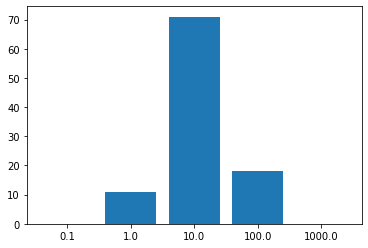

In [100]:
from collections import Counter
resCount = dict(Counter(resBestG)) #Count duplicates of each gamma in the result
G = [1e-1, 1e0, 1e+1, 1e+2, 1e+3]
G_str = [str(g) for g in G]
#Fill out the list of gamma's duplicate
G_choice = [resCount.get(g_str) if resCount.get(g_str) else 0 for g_str in G_str] 

plt.figure()
plt.bar(G_str, G_choice)
plt.show()

<font size="4"> 
From the result of 100 times of vlidations, we can infer that model is suitable with $\gamma=10$ while $C=0.1$
<font />

# Question 17
<font size="4"> 
Let $z_n$ be the transformed data that start we constant 1<br />
<br />
$\begin{equation} \label{eq1}
\begin{split}
w & = \sum_{sv}\alpha_ny_nz_n \\
 & = \sum_{sv}\alpha_ny_n\phi(x_n) \\
 & = \sum_{sv}\alpha_ny_n(1+...) 
\end{split}
\end{equation}$
<br />
<br />
We can seperate the constant term as $w_i$ <br />
and since $\alpha_{notSV}=0$ <br />
<br />
$w_i=\sum_{sv}\alpha_ny_n(1)=\sum_{n=1}^{N}\alpha_ny_n$
<br />
<br />
Since the optimal weight $w$ observes constraint $\sum_{n=1}^{N}a_ny_n=0$ <br />
We can know that $w_i=0$
</font> 